In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_csv_arrays(file_location, require_yerr=False):
    # Read CSV
    df = pd.read_csv(file_location, header=None)
    
    # First row has array names
    array_names = df.iloc[0].to_list()
    
    # Remaining rows are the data
    data = df.iloc[1:].astype(float).reset_index(drop=True)
    
    # Convert columns to numpy arrays
    arrays = {name: data.iloc[:, i].to_numpy() for i, name in enumerate(array_names)}
    
    # Print arrays for reference
    for i, name in enumerate(array_names):
        print(f"{i}: {name} -> {arrays[name]}")
    
    # Ask user which arrays to use
    x_idx = int(input("Enter the number for the x array: "))
    y_idx = int(input("Enter the number for the y array: "))
    
    
    x_name = array_names[x_idx]
    y_name = array_names[y_idx]
    
    x = arrays[x_name]
    y = arrays[y_name]
    
    yerr = None
    yerr_name = None
    if require_yerr:
        y_err_idx = int(input("Enter the number for the y error array: "))
        yerr_name = array_names[y_err_idx]
        yerr = arrays[yerr_name]
    
    return x, y, yerr, x_name, y_name, yerr_name

def weighted(file_location):
    x, y, yerr, x_name, y_name, _ = load_csv_arrays(file_location, require_yerr=True)
    slope, intercept = np.polyfit(x, y, 1, w=1/yerr**2)
    
    # Predicted y values
    y_fit = slope * x + intercept
    
    # Chi-squared calculation
    chi_squared = np.sum(((y - y_fit) / yerr)**2)
    dof = len(x) - 2  # degrees of freedom (2 parameters: slope, intercept)
    reduced_chi_squared = chi_squared / dof
    
    print(f"\nWeighted linear fit: {y_name} vs {x_name}")
    print(f"Slope (weighted): {slope:.4f}")
    print(f"Intercept (weighted): {intercept:.4f}")
    print(f"Chi-squared: {chi_squared:.4f}")
    print(f"Reduced Chi-squared: {reduced_chi_squared:.4f}")
    
    # Plot
    plt.errorbar(x, y, yerr=yerr, fmt='o', label="Data with errors", alpha=0.7)
    plt.plot(x, y_fit, 'r-', label="Weighted fit line")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.legend()
    plt.show()

def unweighted(file_location):
    x, y, _, x_name, y_name, _ = load_csv_arrays(file_location, require_yerr=False)
    slope, intercept = np.polyfit(x, y, 1)
    
    y_fit = slope * x + intercept
    chi_squared = np.sum((y - y_fit)**2)
    dof = len(x) - 2
    reduced_chi_squared = chi_squared / dof
    
    print(f"\nFitting {y_name} vs {x_name}")
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"Chi-squared: {chi_squared:.4f}")
    print(f"Reduced Chi-squared: {reduced_chi_squared:.4f}")
    
    plt.scatter(x, y, label=f"Data: {y_name} vs {x_name}", alpha=0.7)
    plt.plot(x, y_fit, color="red", label="Best fit line")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.legend()
    plt.show()

0: x -> [ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]
1: noisy_y -> [ 1.73605093  3.6616867   1.18057784  2.61023171  5.95986212  4.19414535
  5.81784632  4.36012847  6.61494503  8.40938074  9.93824473  9.58053307
  7.66677883 11.16271344 12.60027543 11.27176999 12.40007799 13.95308359
 13.38008213 16.07981481 14.14410793 14.17439339 10.04492371 17.43086475
 17.06932898 18.40780478 21.25215536 21.33588224 19.68045291 23.41451091]
2: y_error -> [1.60423822 1.94254136 1.06175292 0.31294443 1.58832935 2.17775318
 0.50906212 1.14346873 0.92035736 1.64063992 2.00403526 2.86596018
 2.10636437 2.72173848 1.84885394 0.6376689  0.91616065 2.87629562
 1.50697538 2.99815586 0.387873

Enter the number for the x array:  0
Enter the number for the y array:  1



Fitting noisy_y vs x
Slope: 1.9739
Intercept: 1.4481
Chi-squared: 85.1874
Reduced Chi-squared: 3.0424


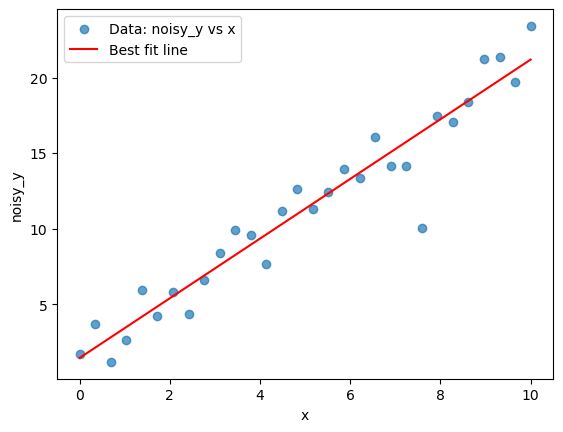

0: x -> [ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]
1: noisy_y -> [ 1.73605093  3.6616867   1.18057784  2.61023171  5.95986212  4.19414535
  5.81784632  4.36012847  6.61494503  8.40938074  9.93824473  9.58053307
  7.66677883 11.16271344 12.60027543 11.27176999 12.40007799 13.95308359
 13.38008213 16.07981481 14.14410793 14.17439339 10.04492371 17.43086475
 17.06932898 18.40780478 21.25215536 21.33588224 19.68045291 23.41451091]
2: y_error -> [1.60423822 1.94254136 1.06175292 0.31294443 1.58832935 2.17775318
 0.50906212 1.14346873 0.92035736 1.64063992 2.00403526 2.86596018
 2.10636437 2.72173848 1.84885394 0.6376689  0.91616065 2.87629562
 1.50697538 2.99815586 0.387873

Enter the number for the x array:  0
Enter the number for the y array:  1
Enter the number for the y error array:  2



Weighted linear fit: noisy_y vs x
Slope (weighted): 2.0011
Intercept (weighted): 0.6525
Chi-squared: 36.3159
Reduced Chi-squared: 1.2970


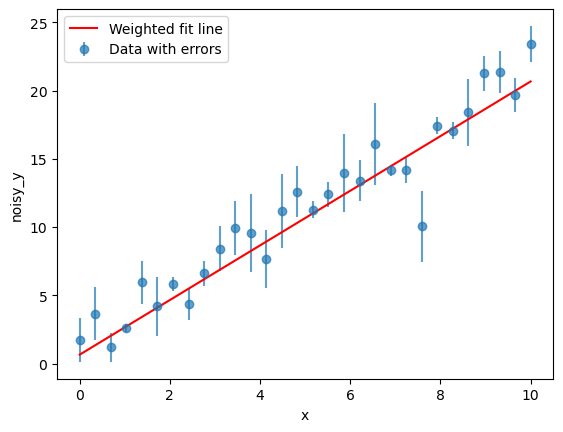

In [4]:
unweighted(r"C:\Users\v564k261\Downloads\linear_data_v1.csv")
weighted(r"C:\Users\v564k261\Downloads\linear_data_v1.csv")